# Marketing Analysis -- Final Project 
## Code Session 
## Yiyin Zhang (yz7067)

# 0. Visualization

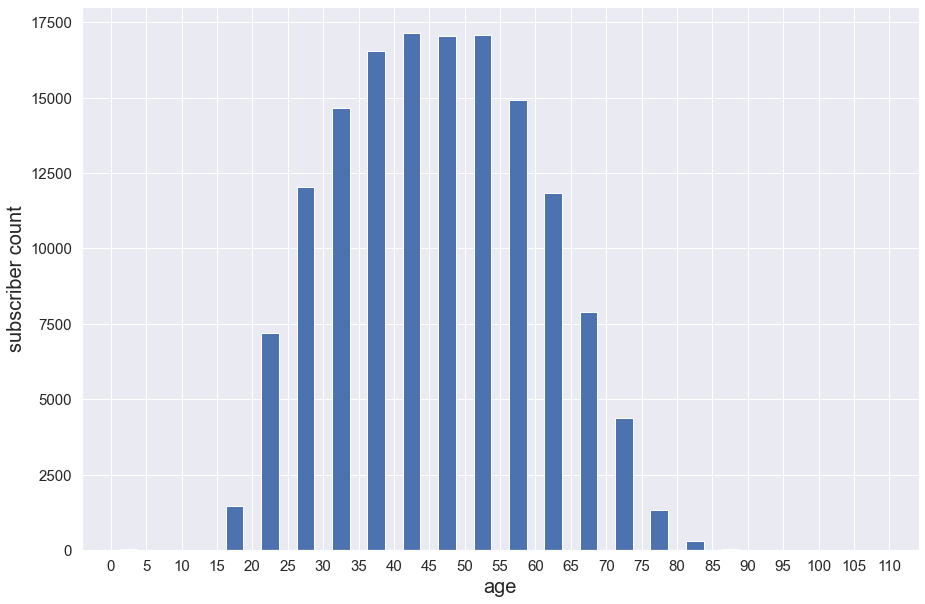

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

plt.tick_params(labelsize=15)

a = np.array(cust['age'])
ax.hist(a, bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110], rwidth=0.5)
#ax.set_title('age', fontsize=20)
ax.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110])
ax.set_xlabel('age', fontsize=20)
ax.set_ylabel('subscriber count', fontsize=20)

plt.savefig('age distribution.png')
plt.show()

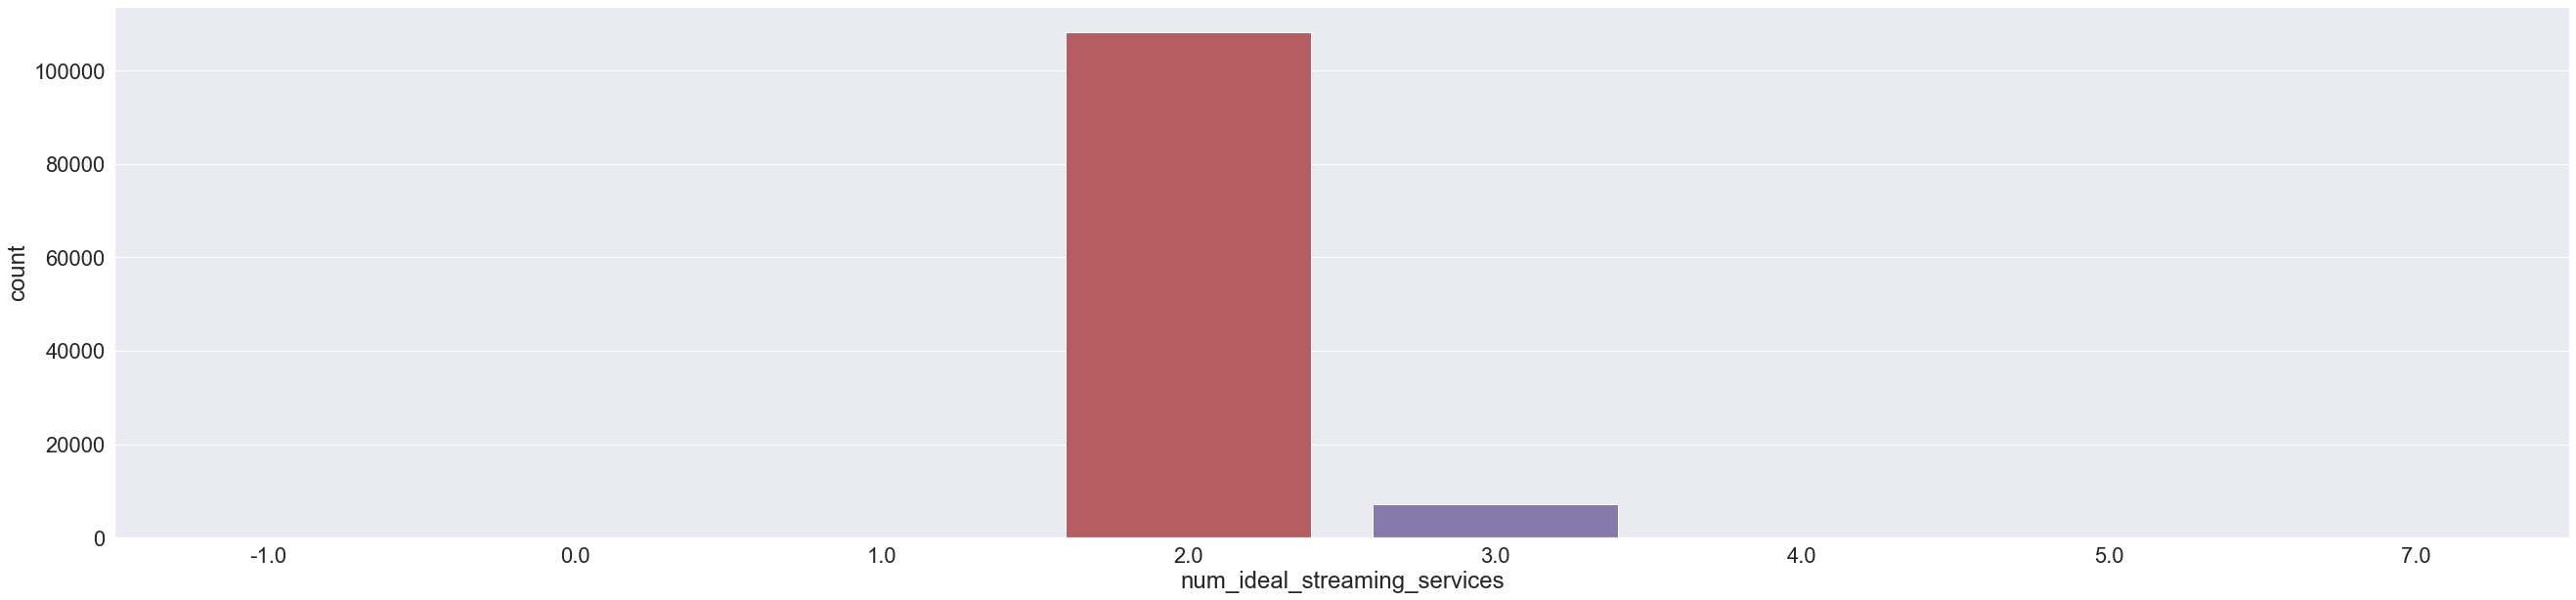

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(45,10))
sns.countplot(x='num_ideal_streaming_services',data=df)#palette = ['#8e1f0b','#db6d25ff', '#ffb03bff','#ffce4bff'])
#pd.set_option('display.float_format', lambda x: '%.10f' % x)
plt.ticklabel_format(style='plain', axis='y')

# 1. Customer Segmentation

In [2]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('subscribers-updated.csv')
df = df.drop(['Unnamed: 0'], axis=1,)
df.info()

In [5]:
for n in range(0,len(df)):
    if df.loc[n,'age'] > 2018:
        df.loc[n,'age'] = None
    elif df.loc[n,'age'] > 1929:
        df.loc[n,'age'] = 2019 - df.loc[n,'age']
    elif df.loc[n,'age'] > 108:
        df.loc[n,'age'] = None

In [6]:
#Drop age's negative value
df=df[df['age']>0]
#Drop weekly_consumption_hour's negative value
df=df[df['weekly_consumption_hour']>0]
#Drop num_ideal_streaming_services's negative value
df=df[df['num_ideal_streaming_services']>0]

In [7]:
df.dropna(subset=['package_type','preferred_genre','intended_use','weekly_consumption_hour','age','op_sys','male_TF'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92858 entries, 1 to 227562
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   subid                         92858 non-null  int64  
 1   package_type                  92858 non-null  object 
 2   num_weekly_services_utilized  92858 non-null  float64
 3   preferred_genre               92858 non-null  object 
 4   intended_use                  92858 non-null  object 
 5   weekly_consumption_hour       92858 non-null  float64
 6   num_ideal_streaming_services  92858 non-null  float64
 7   age                           92858 non-null  float64
 8   male_TF                       92858 non-null  object 
 9   country                       92858 non-null  object 
 10  attribution_technical         92858 non-null  object 
 11  attribution_survey            92611 non-null  object 
 12  op_sys                        92858 non-null  object 
 13  

In [8]:
cust = df[['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour','num_ideal_streaming_services',
       'age', 'male_TF','attribution_technical', 'op_sys']]
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92858 entries, 1 to 227562
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   subid                         92858 non-null  int64  
 1   package_type                  92858 non-null  object 
 2   num_weekly_services_utilized  92858 non-null  float64
 3   preferred_genre               92858 non-null  object 
 4   intended_use                  92858 non-null  object 
 5   weekly_consumption_hour       92858 non-null  float64
 6   num_ideal_streaming_services  92858 non-null  float64
 7   age                           92858 non-null  float64
 8   male_TF                       92858 non-null  object 
 9   attribution_technical         92858 non-null  object 
 10  op_sys                        92858 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 8.5+ MB


In [9]:
numweek = cust.num_weekly_services_utilized.mean()
numideal = cust.num_ideal_streaming_services.mean()
cust['num_weekly_services_utilized'].fillna(numweek,inplace=True)
cust['num_ideal_streaming_services'].fillna(numideal,inplace=True)

/Users/spencerzhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
custdum=pd.get_dummies(cust,drop_first = True)
custdum.info()
custdumnoid = custdum.iloc[:,1:50] #Remove subid columns
custdumnoid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92858 entries, 1 to 227562
Data columns (total 50 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   subid                                          92858 non-null  int64  
 1   num_weekly_services_utilized                   92858 non-null  float64
 2   weekly_consumption_hour                        92858 non-null  float64
 3   num_ideal_streaming_services                   92858 non-null  float64
 4   age                                            92858 non-null  float64
 5   package_type_economy                           92858 non-null  uint8  
 6   package_type_enhanced                          92858 non-null  uint8  
 7   preferred_genre_drama                          92858 non-null  uint8  
 8   preferred_genre_international                  92858 non-null  uint8  
 9   preferred_genre_other                          92

In [11]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
custdumnoid_scaled = minmaxscaler.fit_transform(custdumnoid) 

## inertia 

In [12]:
from sklearn.cluster import KMeans
# criterion: inertia #看平的点
inertias = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(custdumnoid_scaled)  # here we do not use fit_transform since we don't need the transformed result
    inertias[k] = kmeans.inertia_
print(inertias) 

{2: 182922.32441637194, 3: 167398.0024826137, 4: 157729.6188590001, 5: 152041.43557553273, 6: 145602.68927366694, 7: 140765.6469587886, 8: 136002.6563077124, 9: 131918.55241001843, 10: 129441.74176012521, 11: 127432.83879599585, 12: 122504.59265059541, 13: 120094.7618455486, 14: 117871.90841464499, 15: 117844.13474659972, 16: 113640.23961351275, 17: 112258.72046445418, 18: 111536.08242742706, 19: 109871.84566042258}


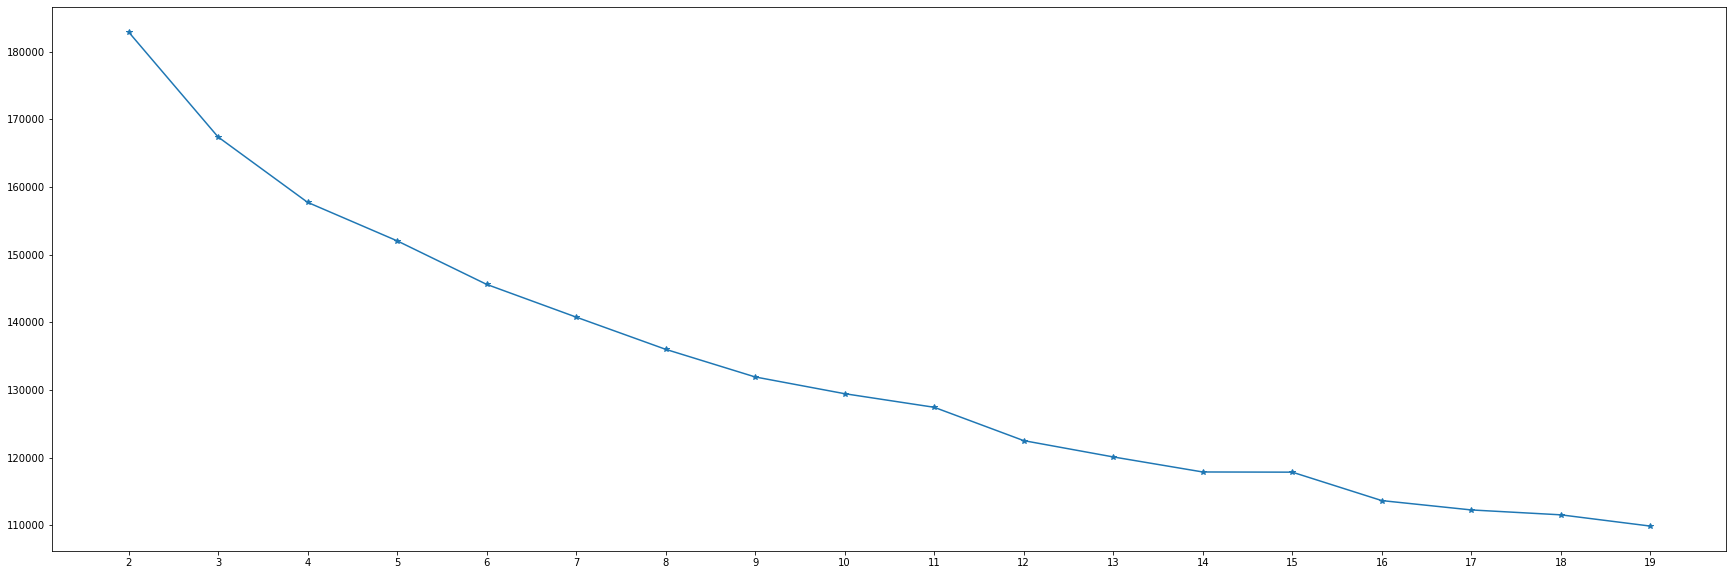

In [15]:
import matplotlib.pyplot as plt #select: 5?
f, ax = plt.subplots(figsize=(30,10))
ax = plt.subplot()
ax.plot(list(inertias.keys()), list(inertias.values()) ,'-*')
ax.set_xticks(np.arange(2, 20))
#ax.grid()
plt.show()

In [16]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=1996)
y_pred = kmeans.fit_predict(custdumnoid_scaled)
y_pred

array([0, 2, 1, ..., 1, 1, 3], dtype=int32)

In [17]:
#put the cluster number back to 
custclus = pd.DataFrame(cust)
custclus['cluster'] = y_pred
custclus['cluster'].value_counts()
custclus=custclus.reset_index()
custclus.drop('index',axis='columns', inplace=True)

In [19]:
custclus.to_csv('cluster4F.csv')

In [ ]:
# 2. Attribution Allocation